# <a>Clustering & PCA Assignment

### Project Brief:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that comes while making this decision are mostly related to choosing the countries that are in the direst need of aid.

My job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. I have to suggest the countries which the CEO needs to focus on the most.

Following steps will be followed:

1. Importing Libraries
2. Reading and understanding the dataset
3. Data Treatment
4. Data Visualisation
5. PCA on the data
6. Hopkins Test
7. K-Means clustering
8. Hierarchical clustering
9. Summary
10. Conclusion

## <b id ='1'>1. Importing Libraries

Let us first import NumPy and Pandas and read the country dataset

In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",None)
pd.set_option('display.max_colwidth', 1000)

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# Supress the warnings
import warnings
warnings.filterwarnings('ignore')

# For Visualising the data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
sns.set_color_codes()

# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

#Improting the PCA module
from sklearn.decomposition import PCA

# For Hopkins test
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

# For clustering 
## using KMeans ##
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## using Hierarchical ##
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


## <b id ='2'>2. Reading & Understanding the dataset

### a) Reading the Dataset

In [3]:
# Importing data-dictionary.csv
data_dict = pd.read_csv('data-dictionary.csv')
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services. Given as %age of the Total GDP
3,health,Total health spending as %age of Total GDP
4,imports,Imports of goods and services. Given as %age of the Total GDP
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [4]:
# Importing Country-data.csv
country = pd.read_csv('Country-data.csv')

### b) Data Understanding 

$Let$ $us$ $inspect$ $the$ $various$ $aspects$ $of$ $the$ $country$ $dataframe$

**Glimpse of Data**

In [5]:
# Checking few rows of the dataset to get its feel
print("First few rows of the dataset are as follows:")
country.head()

First few rows of the dataset are as follows:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
country.shape

(167, 10)

<a>The number of rows are = 167

The number of columns are = 10<a>

<b id ='2'> b.) Data Distribution

In [7]:
print("Data Description for numerical columns is as follows:")
country.describe()


Data Description for numerical columns is as follows:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
print("Data Description for Categorical(Country) column is as follows:")
country.describe(include = ['object'])

Data Description for Categorical(Country) column is as follows:


,country
count,167
unique,167
top,Azerbaijan
freq,1


<a> From the above description, we can see that most of the data is well distributed. We will confirm the same from further Exploratory data analysis. <a>

## <b id ='3'>3. Data Treatment

### a) Data type check

In [9]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


<a> We can observe that all the columns have correct data types and none of them need data type correction.<a>

### b) Missing value check

In [10]:
# Checking for missing value
null_values = round(country.isnull().sum()/len(country.index) *100,2)
null_values.sort_values(ascending = False)

gdpp          0.0
total_fer     0.0
life_expec    0.0
inflation     0.0
income        0.0
imports       0.0
health        0.0
exports       0.0
child_mort    0.0
country       0.0
dtype: float64

<a> We can observe that none of the columns have missing values.<a>

### c) Duplicate check

In [11]:
# Duplicate check

sum(country.duplicated(subset = 'country')) == 0

True

<a> Hence we can say that there is no duplicate data in the target column

### d) Derived Metrices <br>

From the data dictionary, we can see that Imports, Exports and health is expressed in terms of ratio of GDP per capita. These values do not give a clear picture of 
the devlopment of the country. Hence, Let us convert them into a more simple and straightforward values using GDPP since, GDP data and population data is not present ihe data set.

In [12]:
# Converting exports,imports and health spending percentages.

country['exports'] = country['exports'] * country['gdpp']/100
country['imports'] = country['imports'] * country['gdpp']/100
country['health'] = country['health'] * country['gdpp']/100

In [13]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


 ## <b id ='4'>4. Data Visualisation

<b id ='5'> a.) Visualising predictor Variables 
<br><br>
Our analysis revolves around discovering those countries which are in dire need of help to fight against poverty and relief during the time of disasters and natural calamities. We categorise the countries using socio-economic and health factors that determine the overall development of the country. Let us look at such 10 poorly or well performing(Depending upon the category) countries from each category to understand the relationship between these factors.

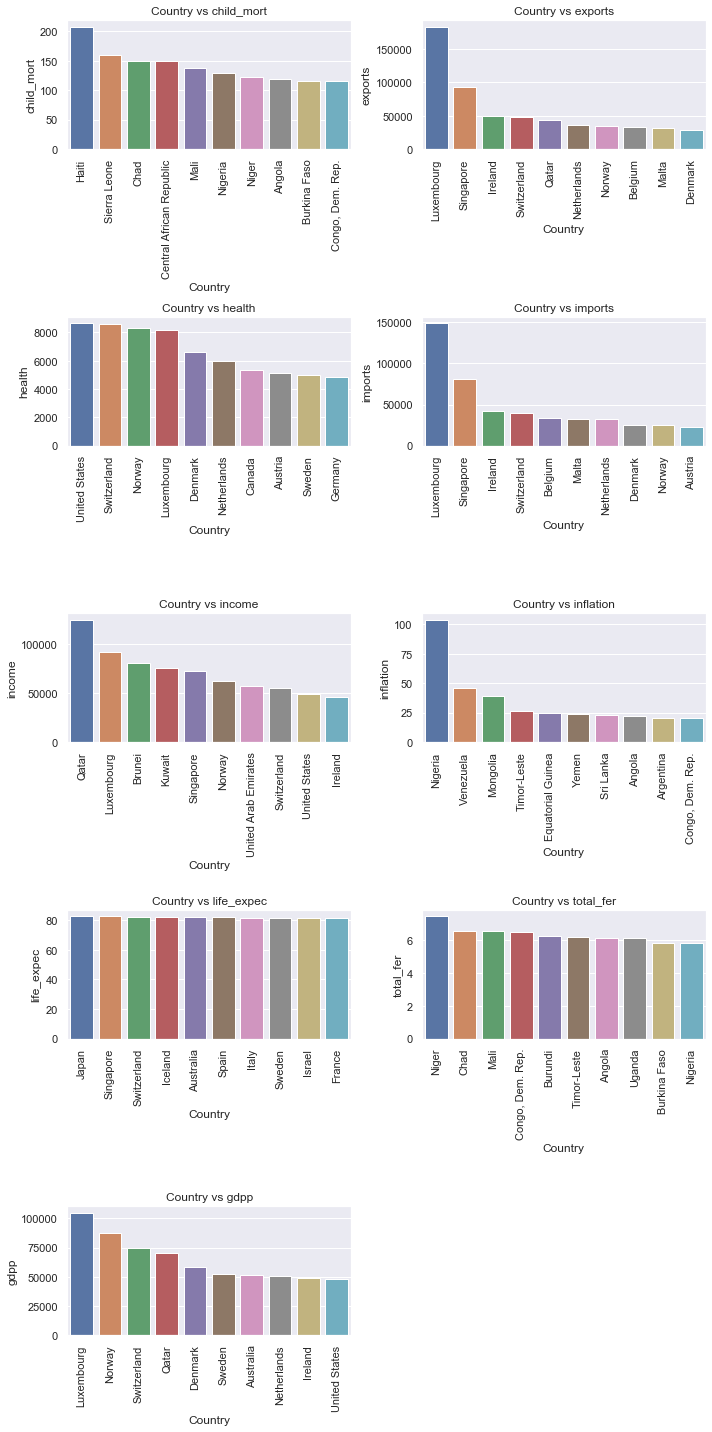

In [14]:
# fig, axs = plt.subplots(3,3,figsize = (15,15))
def barplot(y,fig):
    plt.subplot(5,2,fig)
    dire_need = country[['country',y]].sort_values(y, ascending = False).head(10)
    sns.barplot(x='country', y= y, data = dire_need)
    plt.title('Country' +' '+'vs'+' '+ y)
    plt.ylabel(y)
    plt.xlabel('Country')
    plt.xticks(rotation = 90)

plt.figure(figsize=(10,20))

barplot('child_mort',1)
barplot('exports',2)
barplot('health',3)
barplot('imports',4)
barplot('income',5)
barplot('inflation',6)
barplot('life_expec',7)
barplot('total_fer',8)
barplot('gdpp',9)

plt.tight_layout()

### <a>**Inference:**

<a> 
 
 - Child mortality Vs. Country plot shows 10 such countries whose mortality rate is very high. Hence need special attention.
 - Plots for exports,imports, health, income, life expectancy, total fertility and gdpp show the 10 most well performing countries in each of the categories respectively.
 - Inflation plot shows countries that face maximum inflation.
 - From the above plots we can observe that for countries whose gdpp is high, have high income per capita, high imports, more health spending and high exports. These countries have low child mortality rate and less inflation. In other words, these countries fall under the category of Developed countries. For eg. Luxemberg is a devloped country.
 - Similarly if we observe Nigeria has high child mortality rate and high inflation too. So countries having high child mortality,high inflation, less income and hence less gdpp fall under the category of Backward country or Under- devloped country.

In [15]:
# Putting response variable to y 
y = country.pop('country')

# Putting feature variables to X
X = country

In [16]:
print("Size of Feature variables dataset is:",X.shape)
print("Size of response variable dataset is:",y.shape)

Size of Feature variables dataset is: (167, 9)
Size of response variable dataset is: (167,)


<b id ='5'> b.) Observing correlation among these variables

In [17]:
# Observing the correlation among these numerical predictor variables

country.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


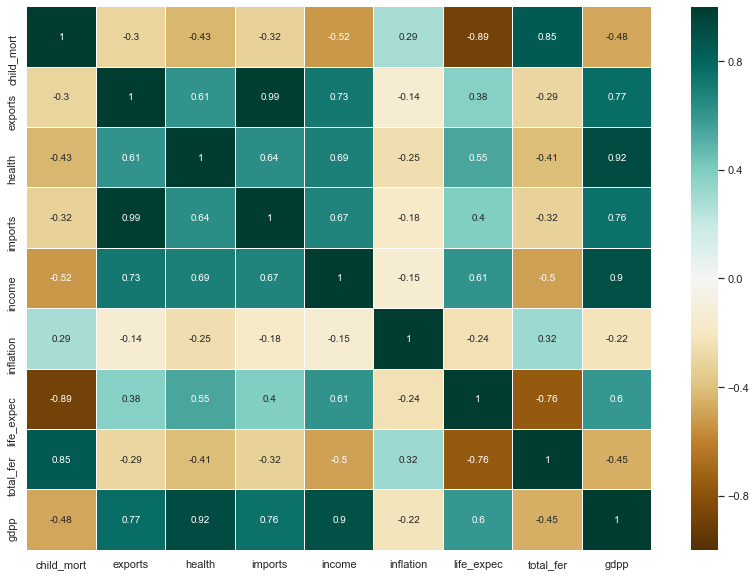

In [18]:
# let us observe Heatmap
plt.figure(figsize = (14,10))
sns.heatmap(country.corr(), annot = True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<a> We observe high correlations among many variables. Among these variables, let us see which variables have high correlation and which have least correlation.

In [19]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(country.transpose())

#Make a diagonal matrix with diagonal entry of Matrix corrmat
p = np.diagflat(corrmat.diagonal())

# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max positive corr:",round(corrmat_diag_zero.max(),3), ", min negative corr: ", round(corrmat_diag_zero.min(),3))

max positive corr: 0.988 , min negative corr:  -0.887


<a> Maximum positive correlation observed is : 0.988  <br>
    Maximum Negative correlation observed is : -0.887

In [20]:
# Retrieve the (i,j) index for which matrix has maximum value
ij_max = np.unravel_index(corrmat_diag_zero.argmax(), corrmat_diag_zero.shape)
print("ij_max",ij_max)
print("Maximum correlation :",corrmat_diag_zero[ij_max])

ij_max (3, 1)
Maximum correlation : 0.9876861072683376


<a> We can see that `exports` and `imports` are highly correlated with each other

In [21]:
# Retrieve the (i,j) index for which matrix has absolute minimum value
ij_min = np.unravel_index(np.absolute(corrmat).argmin(), corrmat.shape)
print("ij_min",ij_min)
print("Minimum correlation :",corrmat_diag_zero[ij_min])

ij_min (5, 1)
Minimum correlation : -0.14155308546714776


<a> `inflation` and `exports` observe least correlation among them.

 ## <b id ='5'>5. PCA on the data

we can see that some columns have significant correlation among themselves. This collinearity can hamper our interpretations. Principal component analysis (PCA) is one of the most commonly used dimensionality reduction techniques in the industry. So let us adopt PCA to solve this problem. PCA will also help in dimensionality reduction.

In [22]:
print("Glimpse of Feature variables dataset - X:")
X.head()

Glimpse of Feature variables dataset - X:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [23]:
print("Glimpse of Response variable dataset - y:")
y.head()

Glimpse of Response variable dataset - y:


0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

## a) Feature scaling

In [24]:
# Instantiate the object
scaler = StandardScaler()

#scaling these variables
X_scaled = scaler.fit_transform(X)
X_scaled[:5,:5]

array([[ 1.29153238, -0.4110113 , -0.56503989, -0.4322755 , -0.8082454 ],
       [-0.5389489 , -0.35019096, -0.43921769, -0.31367739, -0.3753689 ],
       [-0.27283273, -0.31852577, -0.48482608, -0.35372048, -0.22084447],
       [ 2.00780766, -0.29137452, -0.53236319, -0.34595254, -0.58504345],
       [-0.69563412, -0.10433146, -0.17877054,  0.04073499,  0.10173177]])

In [25]:
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## b) PCA implementation

In [26]:
pca = PCA(random_state = 42)

In [27]:
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
# Let us observe pricipal components created
print("The Principal components are:")
pca.components_

The Principal components are:


array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [29]:
# Let us also look at the variance ratio
np.round(pca.explained_variance_ratio_,decimals =4)*100


array([5.894e+01, 1.845e+01, 9.910e+00, 6.070e+00, 3.030e+00, 2.460e+00,
       9.400e-01, 1.600e-01, 5.000e-02])

In [30]:
# Let us now observe the cumulative variance ratio explained by our variables
var_cumu = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
var_cumu

array([ 58.94,  77.39,  87.3 ,  93.37,  96.4 ,  98.86,  99.8 ,  99.96,
       100.01])

#### Making a scree plot for the explained variance

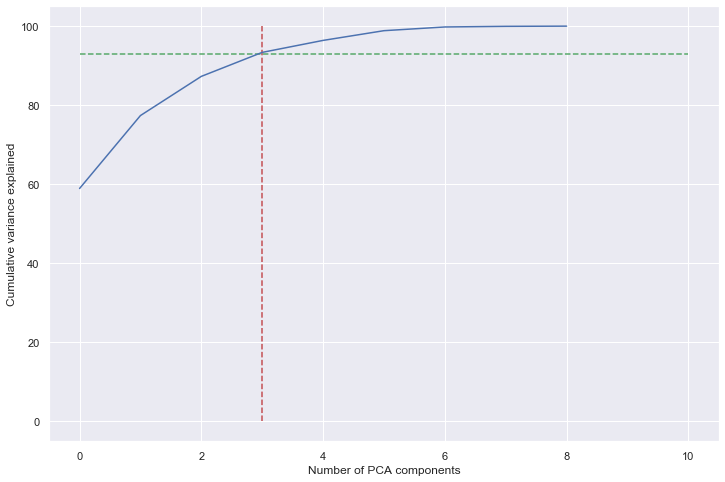

In [31]:

fig = plt.figure(figsize=[12,8])
plt.vlines(x=3, ymax=100, ymin=0, colors="r", linestyles="--")
plt.hlines(y=93, xmax=10, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.xlabel('Number of PCA components')
plt.ylabel("Cumulative variance explained")
plt.show()

<a>Looks like 3 components are enough to describe 93% of the variance in the dataset. We'll choose 3 components for our modeling

In [32]:
# Checking which attributes are well explained by the pca components

cols = list(X.columns)
components = pd.DataFrame({'Features':cols,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
components

,Features,PC1,PC2,PC3
0,child_mort,-0.316392,0.476267,-0.150012
1,exports,0.342887,0.397311,-0.030574
2,health,0.358535,0.155053,-0.075703
3,imports,0.344865,0.370781,-0.072174
4,income,0.380041,0.128384,0.145764
5,inflation,-0.143085,0.221261,0.948419
6,life_expec,0.343857,-0.369820,0.196752
7,total_fer,-0.302842,0.459715,-0.077834
8,gdpp,0.399988,0.200624,0.010339


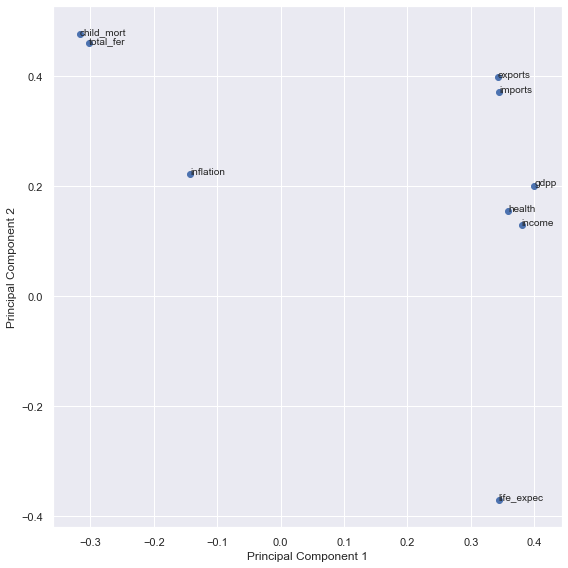

In [33]:
# Plotting the above dataframe for better visualization with PC1 and PC2

%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(components.PC1, components.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(components.Features):
    plt.annotate(txt, (components.PC1[i],components.PC2[i]))
plt.tight_layout()
plt.show()

<a>Observations:<br>
 - `life expectancy, income, gdpp and health` are very well explained by PC1.<br>
 - `imports and exports` are well explained by both the components PC1 and PC2.<br>
 - `child mortality` and `total fertility` are well explained by PC2.<br>
 - `inflation` is better explained by PC2.

#### Adopting Incremental PCA 
Let us Build the dataframe using Incremental PCA for better efficiency.


In [34]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 3)

X_pca_final = pca_final.fit_transform(X_scaled)

In [35]:
print("Size of earlier dataset was :",X.shape)
print("Size of dataset after PCA is:", X_pca_final.shape)

Size of earlier dataset was : (167, 9)
Size of dataset after PCA is: (167, 3)


In [36]:
corrmat = np.corrcoef(X_pca_final.transpose())
corrmat

array([[ 1.        ,  0.00126932, -0.00125103],
       [ 0.00126932,  1.        , -0.00187899],
       [-0.00125103, -0.00187899,  1.        ]])

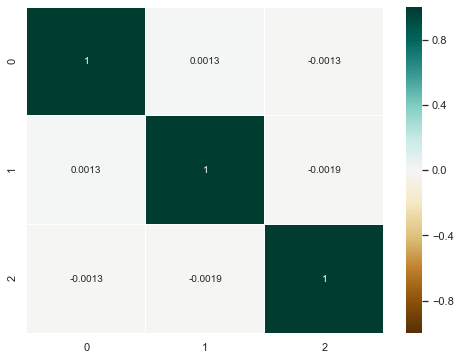

In [37]:
# Plotting Heatmap to check is there still dependency in the dataset.

plt.figure(figsize=[8,6])
sns.heatmap(corrmat, annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<a>We can see from above heatmap that the correlation among the attributes is almost 0, we can proceed with these principal components.

In [38]:
# Creating new dataframe with Principal components

df_pca = pd.DataFrame(X_pca_final, columns=["PC1", "PC2","PC3"])


# Let us concatenate country column with all the principal components
y = y.reset_index()
y = y.drop(['index'],axis = 1)

df_pca_final = pd.concat([y,df_pca], axis=1)
df_pca_final.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


In [39]:
# Let us check the shape of the final pca dataframe
df_pca_final.shape

(167, 4)

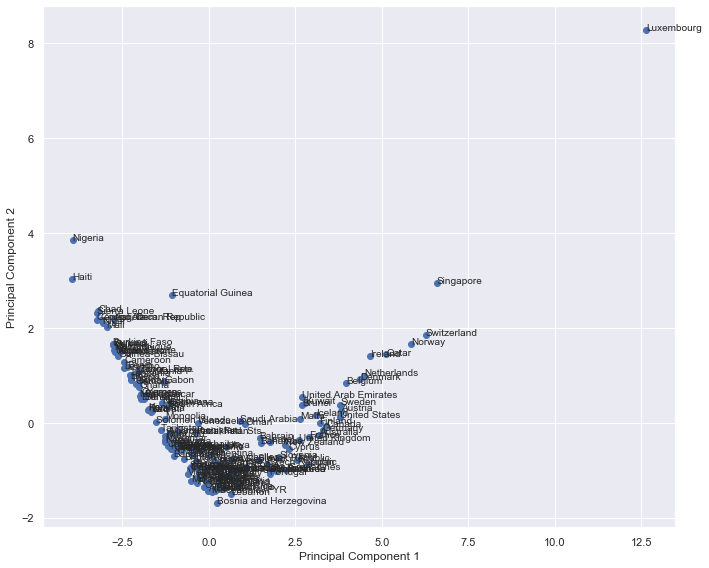

In [40]:
# Plotting scatter plot of all the countries with respect to PC1 & PC2 

%matplotlib inline
fig = plt.figure(figsize = (10,8))
plt.scatter(df_pca_final.PC1, df_pca_final.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(df_pca_final.country):
    plt.annotate(txt, (df_pca_final.PC1[i],df_pca_final.PC2[i]))
plt.tight_layout()
plt.show()

<a>We can observe some grouping that is formed before and after 0 value of PC1. We also observe some extreme values. Let us analyse our PCA dataset for outliers to take care of the same. 

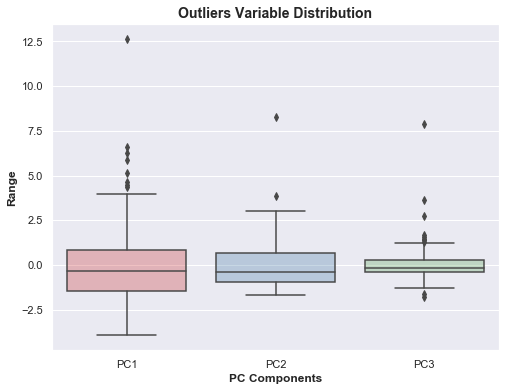

In [41]:
# Outlier analysis

plt.figure(figsize =(8,6))
y = ['PC1','PC2','PC3']
ax = sns.boxplot(data = df_pca_final[y], orient="v", palette="Set1" )
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
plt.show()

<a> We observe many extreme data points in our principal components. Let us treat them as these extreme values can affect our clusters.

In [42]:
# Let us make a copy of our datset before proceeding for outlier treatment
country_treated = df_pca_final.copy()
country_treated.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


In [43]:
# Treating outliers using the Z-score

from scipy import stats

z = np.abs(stats.zscore(country_treated[['PC1', 'PC2', 'PC3']]))

# selecting 2 as the threshold to identify outliers & Removing them

country_no_outliers = country_treated[(z<2).all(axis=1)]

country_no_outliers.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


In [44]:
country_no_outliers.shape

(156, 4)

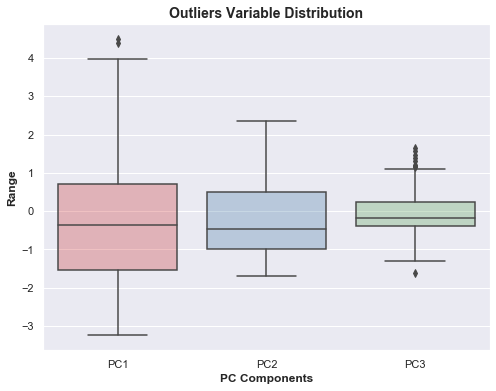

In [45]:
# PLot after outlier treatment

plt.figure(figsize =(8,6))
y = ['PC1','PC2','PC3']
ax = sns.boxplot(data = country_no_outliers[y], orient="v", palette="Set1" )
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
plt.show()

<a> We observe that after treating our dataset for outliers, only few extreme values remain. We choose to proceed with this dataset as treating them beyond this point will hamper our dataset.

In [46]:
print("Principal component for each country is as follow:")
country_no_outliers.head()

Principal component for each country is as follow:


,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


In [47]:
df  = country_no_outliers.drop(['country'],axis=1).reset_index().drop('index',axis =1)
print("Principal component dataset is as follow:")
df.head()

Principal component dataset is as follow:


,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
1,-0.022277,-1.431896,-0.020701
2,-0.457626,-0.673301,0.961867
3,-2.724520,2.174583,0.606687
4,0.649849,-1.024374,-0.250103


 ## <b id ='6'>6. HOPKINS TEST <br>

The Hopkins statistic is a way of measuring the cluster tendency of a data set. If this value is close to 1, it indicates that data has high tendency to form clusters.

In [48]:
# Calculating Hopkins score

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [49]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(df)

0.8235373894336385

<a> **Conclusion:<br>**
Above 0.7 is a good Hopkins score for Clustering. It indicates that the treated dataset has good tendency to form clusters.

 ## <b id ='7'>7.  K - means clustering.

It is one of the simplest and popular unsupervised machine learning algorithms. The important step in this clustering technique is to determine optimal number of clusters. Following methods solve this problem of arriving at optimal number of clusters.

 ### <b id ='7'>a.) Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [50]:
# Silhouette analysis

ss = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]     #(number of clusters)

for num_clusters in range_n_clusters:
    
    # initialise kmeans
    kmeans = KMeans(n_clusters = num_clusters, max_iter = 50 )
    kmeans.fit(df)
    
    cluster_labels = kmeans.labels_
    
    # silhoette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    
    ss.append([num_clusters, silhouette_avg])
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters = 2, the silhouette score is 0.4489647667362098
For n_clusters = 3, the silhouette score is 0.5112859245350302
For n_clusters = 4, the silhouette score is 0.4313572449682616
For n_clusters = 5, the silhouette score is 0.3725177799880642
For n_clusters = 6, the silhouette score is 0.3523769913647433
For n_clusters = 7, the silhouette score is 0.39273670872431427
For n_clusters = 8, the silhouette score is 0.37634335034366917


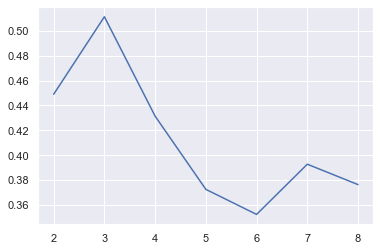

In [51]:
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])
plt.show()

<a>With `3` clusters, the silhouette score is higher compared to other number of clusters. Let us confirm this from elbow curve method.

 ### <b id ='7'>b.) Elbow Curve
 `Elbow curve method` is also a popular method that is popularly used to determine the `optimal value of k`.

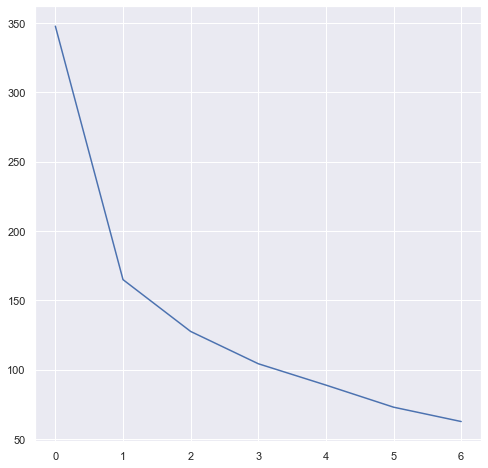

In [52]:
## Finding optimal number of clusters using Elbow curve method
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]     #(number of clusters)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter = 50, random_state= 100)
    kmeans.fit(df)
    
    ssd.append(kmeans.inertia_)
    
fig = plt.figure(figsize = (8,8))    
plt.plot(ssd)

<a> **Conclusion:**<br>
Looking at the above elbow curve, we can say that it looks good to proceed with either `Three or Four` clusters.

In [53]:
# let us consider k = 3
kmeans = KMeans(n_clusters = 3, max_iter = 50 )
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0,
       2, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 1, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 0,
       0, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0,
       1, 1])

In [55]:
len(kmeans.labels_)

156

In [56]:
# Assign the labels
country_no_outliers['kmeans_cluster_id'] = kmeans.labels_
country_no_outliers.head()

,country,PC1,PC2,PC3,kmeans_cluster_id
0,Afghanistan,-2.637442,1.469038,-0.541359,1
1,Albania,-0.022277,-1.431896,-0.020701,0
2,Algeria,-0.457626,-0.673301,0.961867,0
3,Angola,-2.724520,2.174583,0.606687,1
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103,0


In [57]:
# Number of countries in each cluster

country_no_outliers['kmeans_cluster_id'].value_counts()

0    80
1    45
2    31
Name: kmeans_cluster_id, dtype: int64

<a> We can see that clusters are well distributed. So let us proceed with three clusters.

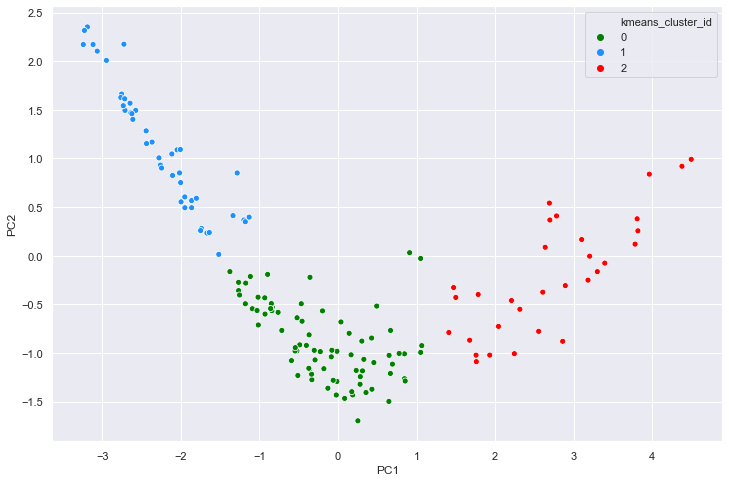

In [58]:
# Scatter plot on Principal components to visualize the spread of the data

fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',hue='kmeans_cluster_id',palette=['green','dodgerblue','red'],data=country_no_outliers)

<a>We have visualized the data on the principal components and have observed the clusters that are formed. These clusters seem to have less intra-cluster distances and more inter- cluster distances. So let us proceed with 3 clusters. Now lets visualize the data on the original attributes.

In [59]:
# Merging the PCA treated df with the original df

# Let us concatenate country column with all the principal components
country = country.reset_index()
country = country.drop(['index'],axis = 1)


merge_df = pd.concat([country_no_outliers,country],axis =1).dropna()
merge_df.head()

,country,PC1,PC2,PC3,kmeans_cluster_id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.637442,1.469038,-0.541359,1.0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,-0.022277,-1.431896,-0.020701,0.0,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,-0.457626,-0.673301,0.961867,0.0,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,-2.724520,2.174583,0.606687,1.0,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103,0.0,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [60]:
df_final = merge_df.drop(['country','PC1','PC2','PC3'],axis = 1)
df_final.head()

,kmeans_cluster_id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,0.0,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,0.0,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,1.0,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,0.0,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [61]:
# Creating a dataframe of mean of all the variables of all the clusters

col = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']

mean_values_kmeans = df_final.pivot_table(values = col, index ='kmeans_cluster_id',aggfunc = 'mean').reset_index()
mean_values_kmeans

,kmeans_cluster_id,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
0,0.0,21.960000,2795.328107,6242.775000,392.801255,2924.515889,12309.750000,6.836988,72.991250,2.282750
1,1.0,87.740000,596.277178,1590.000000,101.810878,639.816600,3260.511111,9.719667,59.777778,5.005333
2,2.0,5.396774,16607.370968,36283.870968,3421.859032,15125.545161,39187.096774,2.650677,79.719355,1.760968


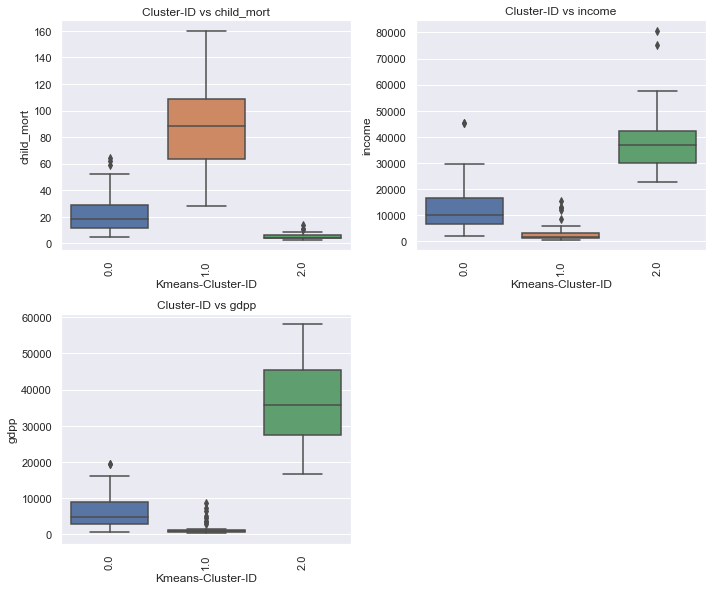

In [62]:
def boxplot(y,fig,):
    plt.subplot(5,2,fig)
    sns.boxplot(x = 'kmeans_cluster_id', y = y, data = merge_df)
    plt.title('Cluster-ID' +' '+'vs'+' '+ y)
    plt.xlabel('Kmeans-Cluster-ID')
    plt.ylabel(y)
    plt.xticks(rotation = 90)

                         
plt.figure(figsize =(10,20))
                         
boxplot('child_mort',1)
boxplot('income',2)
boxplot('gdpp',3)

plt.tight_layout()

### **<a>Observations:**<br>
<a>
Please note that KMeans clustering is a random initialisation technique. The initial centroids are chosen randomly, K-means will likely give different results each time it is run. During my final run, cluster number 1 had the highest child mortality rate.<br>

 - Child Mortality is highest for Cluster 1. It is evident that when child mortality is high in any country, health spendings are low and other economic factors such as income and gdpp is also low. The countries in this cluster need aid as they fall under the category of under-devloped country.
 - Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development. Income per capita and gdpp seems lowest for countries in clusters 1. Hence, countries in this cluster need some help.
 - We can consider countries in cluster 1 as the devloped countries, Countries belonging to cluster 0 as devloping countries and countries belonging to cluster 1 as under- devloped countries.

Since the clusters change every time during the K-Means analysis, we will manually assign the cluster label of that country whose child mortality is highest.

In [63]:
# Let us manually
cluster = df_final[(df_final['child_mort'] == df_final['child_mort'].max())]

In [64]:
kmeans_dire_need = merge_df.loc[merge_df['kmeans_cluster_id']==cluster['kmeans_cluster_id'].values[0]]

kmeans_dire_need = kmeans_dire_need.dropna()[['country', 'child_mort', 'income','gdpp']]
kmeans_dire_need.head()

,country,child_mort,income,gdpp
0,Afghanistan,90.2,1610,553
3,Angola,119.0,5900,3530
17,Benin,111.0,1820,758
21,Botswana,52.5,13300,6350
25,Burkina Faso,116.0,1430,575


In [65]:
len(kmeans_dire_need)

45

There are many variables that influence the development of any country. From the principal component's plot, we have seen that Variables such as child_mort, gdpp and income are well explained by the principal components. Hence we will consider two of these three variables to build some meaningful clusters

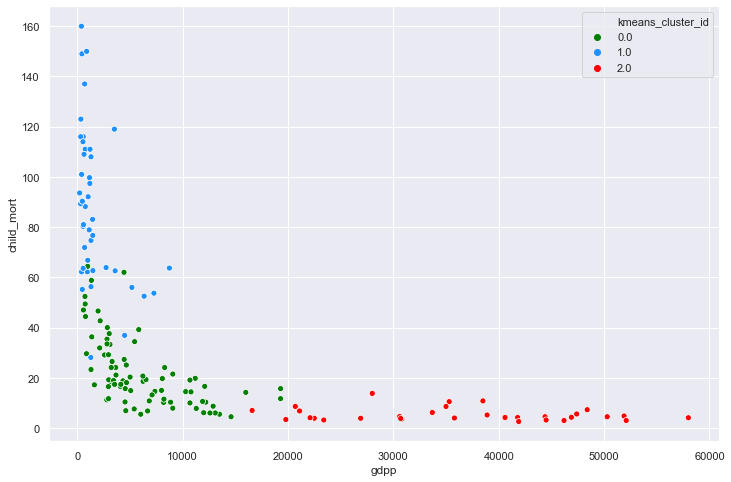

In [66]:
# Scatter plot on Original attributes to visualize the spread of the data
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='gdpp',y='child_mort',hue='kmeans_cluster_id',palette=['green','dodgerblue','red'],data=df_final)

<a>From above scatter plot of gdpp and child_mortality, we can see distinct clusters. We can observe that as child mortality increases, gdpp decreases and vice-versa.

 ## <b id ='8'>8. Hierarchical clustering

Now lets apply Hierarchial Clustering to see if we get any better clusters or not.

In [67]:
# let us perform hierarchical clustering on the scaled dataset
df.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
1,-0.022277,-1.431896,-0.020701
2,-0.457626,-0.673301,0.961867
3,-2.724520,2.174583,0.606687
4,0.649849,-1.024374,-0.250103


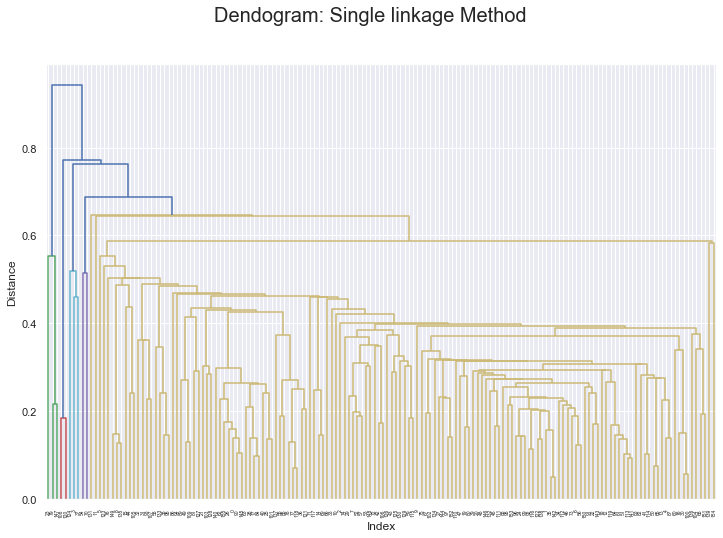

In [68]:
# Single linkage

plt.figure(figsize=(12,8))
mergings = linkage(df, method ='single', metric ="euclidean")
dendrogram(mergings,leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendogram: Single linkage Method",fontsize=20)
plt.show()

<a> The single linkage clustering does not perform well in generating the clusters hence we go for complete linkage

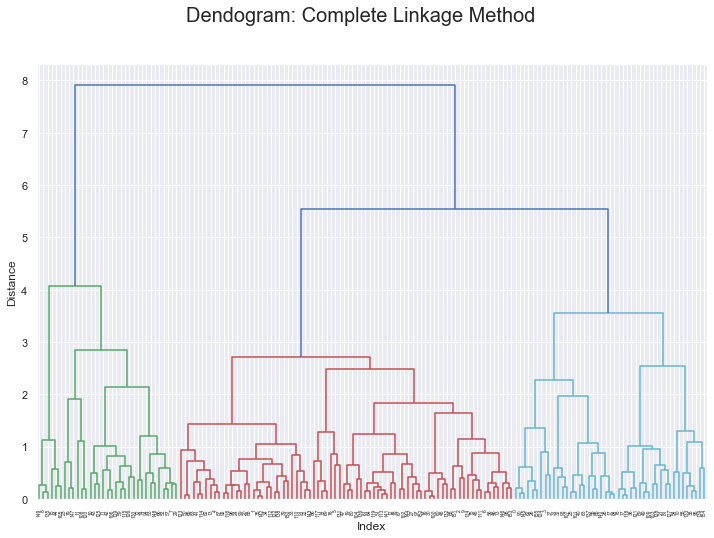

In [69]:
# Complete linkage

plt.figure(figsize=(12,8))
mergings = linkage(df, method ='complete', metric ="euclidean")
dendrogram(mergings,leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendogram: Complete Linkage Method",fontsize=20)
plt.show()

<a> It tend to yield more balanced, attractive clusters. This dendrogram makes much more sense. We will use our complete linkage hierarchical clustering for the analysis. We can cut the dendrogram at the height that will yield a particular number of clusters. Let us proceed with 3 clusters.

In [70]:
# Let us copy the dataset before carrying out hierarchical clustering
df_hc = country_no_outliers.copy()
df_hc.head()

,country,PC1,PC2,PC3,kmeans_cluster_id
0,Afghanistan,-2.637442,1.469038,-0.541359,1
1,Albania,-0.022277,-1.431896,-0.020701,0
2,Algeria,-0.457626,-0.673301,0.961867,0
3,Angola,-2.724520,2.174583,0.606687,1
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103,0


In [71]:
# let us create 3 clusters
cluster_labels = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1))
df_hc['hierarchical_cluster_id'] = cluster_labels
df_hc.head()

,country,PC1,PC2,PC3,kmeans_cluster_id,hierarchical_cluster_id
0,Afghanistan,-2.637442,1.469038,-0.541359,1,0.0
1,Albania,-0.022277,-1.431896,-0.020701,0,1.0
2,Algeria,-0.457626,-0.673301,0.961867,0,1.0
3,Angola,-2.724520,2.174583,0.606687,1,0.0
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103,0,1.0


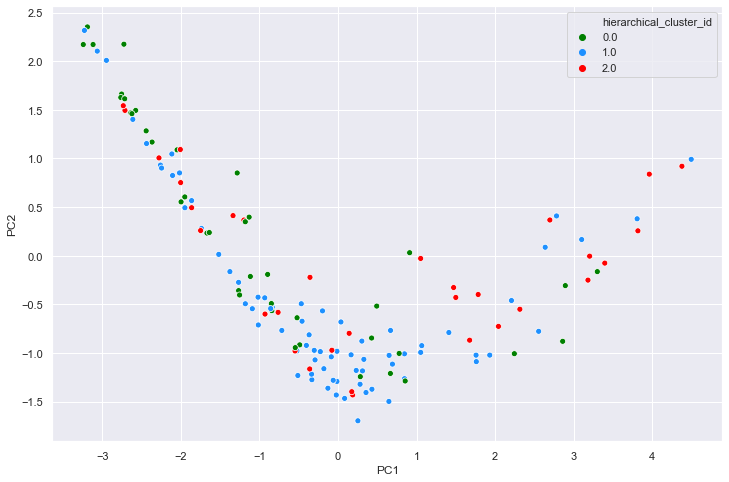

In [72]:
# Scatter plot on Principal components to visualize the spread of the data

fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',hue='hierarchical_cluster_id',palette=['green','dodgerblue','red'],data=df_hc)

<a> The clusters formed are not clear and do not give a clear picture.

In [73]:
# Assign the labels
merge_df['hierarchical_cluster_id'] = cluster_labels
merge_df.head()

,country,PC1,PC2,PC3,kmeans_cluster_id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hierarchical_cluster_id
0,Afghanistan,-2.637442,1.469038,-0.541359,1.0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0.0
1,Albania,-0.022277,-1.431896,-0.020701,0.0,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1.0
2,Algeria,-0.457626,-0.673301,0.961867,0.0,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1.0
3,Angola,-2.724520,2.174583,0.606687,1.0,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0.0
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103,0.0,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1.0


In [74]:
# Creating a dataframe of mean of all the variables of all the clusters
col = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']

merge_df.pivot_table(values = col, index ='hierarchical_cluster_id',aggfunc = 'mean').reset_index()

,hierarchical_cluster_id,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
0,0.0,56.682927,2882.233700,7566.317073,622.511444,2681.733953,11292.219512,7.907829,66.417073,3.662927
1,1.0,32.709589,4472.205463,9193.835616,737.165486,4477.783630,13542.520548,5.678959,72.158904,2.664932
2,2.0,27.781250,8382.868469,17775.093750,1479.691162,7639.876906,22098.687500,7.040938,71.975000,2.832187


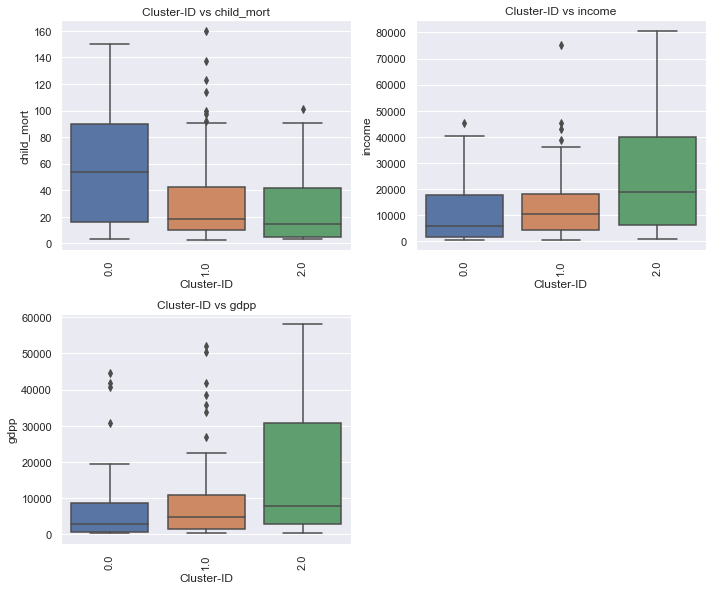

In [75]:
def boxplot(y,fig,):
    plt.subplot(5,2,fig)
    sns.boxplot(x = 'hierarchical_cluster_id', y = y, data = merge_df)
    plt.title('Cluster-ID' +' '+'vs'+' '+ y)
    plt.xlabel('Cluster-ID')
    plt.ylabel(y)
    plt.xticks(rotation = 90)

                         
plt.figure(figsize =(10,20))
                         
boxplot('child_mort',1)
boxplot('income',2)
boxplot('gdpp',3)

plt.tight_layout()

### **<A>Observations:**
<a>    
 - Countries from cluster zero have high child mortalilty rate as compared to countries from other clusters. These countries should be provided help.
 - The Net Income per person of the people in the countries lying in cluster 1 and 2 is more than that of countries in cluster 0.

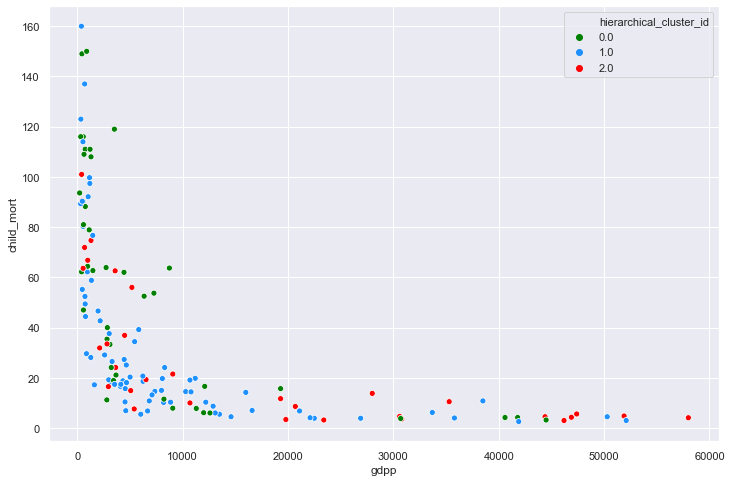

In [76]:
# Scatter plot on Original attributes to visualize the spread of the data
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='gdpp',y='child_mort',hue='hierarchical_cluster_id',palette=['green','dodgerblue','red'],data=merge_df)

<a>From the above plot, we do not see any particular pattern between child mortality and gdpp when plotted against the hierarchical clusters.

In [77]:
# List of countries in Cluster 1

hierarchical_dire_need = merge_df.loc[merge_df['hierarchical_cluster_id']==0]

hierarchical_dire_need = hierarchical_dire_need.dropna()[['country', 'child_mort', 'income','gdpp']]
hierarchical_dire_need.head()

,country,child_mort,income,gdpp
0,Afghanistan,90.2,1610,553
3,Angola,119.0,5900,3530
17,Benin,111.0,1820,758
21,Botswana,52.5,13300,6350
25,Burkina Faso,116.0,1430,575


In [78]:
len(hierarchical_dire_need)

41

 ## <b id ='9'>9. Summary

For a country to be known as a devloped country, it should have following characteristics:
 - less child mortaliy rate,
 - High per capita income
 - High exports
 - High Imports
 - High health spendings
 - High Gdpp
 - Less Inflation

If a country fails to qualify the above conditions, then it falls under either devloping or under-devloped category. To distinguish most Under-devloping countries from the rest, we have sorted our poorly performing countries on the basis of high child mortality rate and less per capita income. We have considered child mortality rate more than 50 and per capita income less than 2000 as our scale to gauge the countries.

In [79]:
hc_priority = hierarchical_dire_need[(hierarchical_dire_need['child_mort'] > 50) &  (hierarchical_dire_need['income'] < 2000)]
hc_priority.sort_values(by='child_mort',ascending = False)

,country,child_mort,income,gdpp
32,Chad,150.0,1930,897
31,Central African Republic,149.0,888,446
25,Burkina Faso,116.0,1430,575
37,"Congo, Dem. Rep.",116.0,609,334
17,Benin,111.0,1820,758
63,Guinea,109.0,1190,648
26,Burundi,93.6,764,231
0,Afghanistan,90.2,1610,553
36,Comoros,88.2,1410,769
155,Uganda,81.0,1540,595


In [80]:
kmean_priority = kmeans_dire_need[(kmeans_dire_need['child_mort'] > 50) &  (kmeans_dire_need['income'] < 2000)]
kmean_priority.sort_values(by='child_mort',ascending = False)

,country,child_mort,income,gdpp
132,Sierra Leone,160.0,1220,399
32,Chad,150.0,1930,897
31,Central African Republic,149.0,888,446
97,Mali,137.0,1870,708
112,Niger,123.0,814,348
25,Burkina Faso,116.0,1430,575
37,"Congo, Dem. Rep.",116.0,609,334
64,Guinea-Bissau,114.0,1390,547
17,Benin,111.0,1820,758
63,Guinea,109.0,1190,648


<a>After comparing both K-means and Heirarchical clustering method, I am proceeding with the results of K-means as the plots are clearly visible. From above tables we can see that from both the methods, the countries that are in dire need of help are somewhat similar. I am considering the result of k-means outcome.  

 ## <b id ='10'>10. Conclusion

### Closing statement:

 - The main `objective` of this assignment is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. 
 - This `task is being undertaken to guide` HELP International NGO which is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities so that proper help shall be provided to countries that are in dire need.
 - To ensure that the backward or under-devloped countries reach help, I have used three factors : `Child Morality Rate,Income and GDP Per Capita`
 - From the Exploratory data analysis plots We can observe following relationship:
      - We can see that for countrirs that high child mortality rate, their income per capita is less. Hence we can say that there is a `negative relationship between income and mortality.` In more sophisticated way we can say that Income is an important determinant of child survival.
      - It is evident that for countries whose Gdpp( which is GDP per capita) is more, their per capita income is also more. GDP is a measure of the total income of everyone in the economy AND the total expenditure on the economy's output of goods and services. In other words when a `country's GDP is high` it means that the country is increasing the amount of production that is taking place in the economy and the `citizens have a higher income` and hence are spending more.
 
 - So these three factors help us distinguish backward countries from the devloped countries.

### Recommendation:

We carried out Exploratory data analaysis on our dataset to understand the relationship of various factors. On the basis of this relationship we chose three factors namely -`Child Morality Rate,Income and GDP Per Capita`. We also adopted PCA and two clustering techniques - 'KMeans and Hierarchical' to ensure that proper help is provided to countries that are in dire need. On the bais of our extensive research, we have shortlisted following countries whose child mortality rate is high and whose income is very low. The list has been prioritized based on high mortality rate and income per capita less than 2000, Sierra Leone being the country having maximum child mortality rate and very less per capita income.

 - Sierra Leone
 - Chad
 - Central African Republic
 - Mali
 - Niger
 - Burkina Faso
 - Congo, Dem. Rep.
 - Guinea-Bissau
 - Benin
 - Guinea
 - Mozambique
 - Burundi
 - Malawi
 - Togo
 - Afghanistan
 - Liberia
 - Comoros
 - Uganda
 - Gambia
 - Rwanda
 - Kiribati
 - Timor-Leste
 - Madagascar
 - Eritrea
